In [16]:
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
filename = 'data/201510-citibike-tripdata.zip'
with zipfile.ZipFile(filename) as myzip:
    with myzip.open(myzip.namelist()[0]) as myfile:
        cb_dat = pd.read_csv(myfile)
        #print(myfile.readline())
        #print(myfile.readline())

In [7]:
cb_dat.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,171,10/1/2015 00:00:02,10/1/2015 00:02:54,388,W 26 St & 10 Ave,40.749718,-74.002950,494,W 26 St & 8 Ave,40.747348,-73.997236,24302,Subscriber,1973,1
1,593,10/1/2015 00:00:02,10/1/2015 00:09:55,518,E 39 St & 2 Ave,40.747804,-73.973442,438,St Marks Pl & 1 Ave,40.727791,-73.985649,19904,Subscriber,1990,1
2,233,10/1/2015 00:00:11,10/1/2015 00:04:05,447,8 Ave & W 52 St,40.763707,-73.985162,447,8 Ave & W 52 St,40.763707,-73.985162,17797,Subscriber,1984,1
3,250,10/1/2015 00:00:15,10/1/2015 00:04:25,336,Sullivan St & Washington Sq,40.730477,-73.999061,223,W 13 St & 7 Ave,40.737815,-73.999947,23966,Subscriber,1984,1
4,528,10/1/2015 00:00:17,10/1/2015 00:09:05,3107,Bedford Ave & Nassau Ave,40.723117,-73.952123,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,16246,Customer,NaN,0


In [8]:
cb_dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1212277 entries, 0 to 1212276
Data columns (total 15 columns):
tripduration               1212277 non-null int64
starttime                  1212277 non-null object
stoptime                   1212277 non-null object
start station id           1212277 non-null int64
start station name         1212277 non-null object
start station latitude     1212277 non-null float64
start station longitude    1212277 non-null float64
end station id             1212277 non-null int64
end station name           1212277 non-null object
end station latitude       1212277 non-null float64
end station longitude      1212277 non-null float64
bikeid                     1212277 non-null int64
usertype                   1212277 non-null object
birth year                 1065765 non-null float64
gender                     1212277 non-null int64
dtypes: float64(5), int64(5), object(5)
memory usage: 148.0+ MB


In [10]:
cb_dat.shape

(1212277, 15)

In [11]:
cb_dat.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,1212277.000000,1212277.000000,1212277.000000,1212277.000000,1212277.000000,1212277.000000,1212277.000000,1212277.000000,1065765.000000,1212277.000000
mean,1079.953503,854.721656,40.738163,-73.987240,831.900867,40.737799,-73.987498,20463.262857,1976.995876,1.089422
std,9985.845810,1011.772614,0.021916,0.015509,990.502413,0.021743,0.015490,3008.946507,11.590119,0.571169
min,61.000000,72.000000,40.678907,-74.017134,72.000000,40.646768,-74.046305,14529.000000,1885.000000,0.000000
25%,388.000000,329.000000,40.722281,-73.998004,327.000000,40.722174,-73.998393,17822.000000,1969.000000,1.000000
50%,633.000000,448.000000,40.739323,-73.988900,446.000000,40.739126,-73.989151,21241.000000,1979.000000,1.000000
75%,1056.000000,521.000000,40.753231,-73.977910,519.000000,40.752996,-73.978059,23176.000000,1986.000000,1.000000
max,3139345.000000,3237.000000,40.787209,-73.929891,3237.000000,40.787209,-73.929891,24743.000000,1999.000000,2.000000


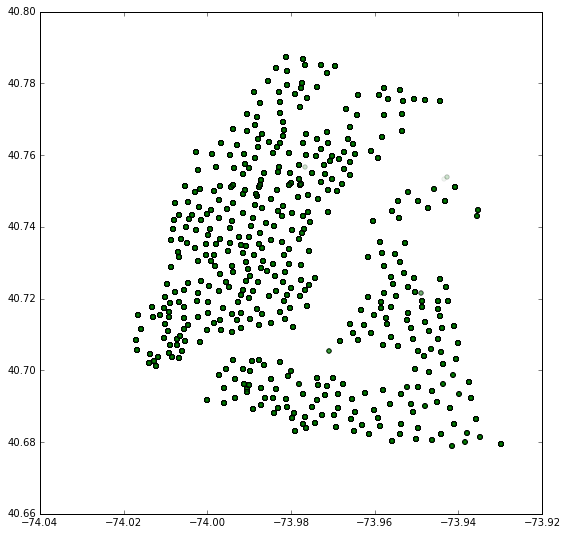

In [17]:
fig,ax = plt.subplots(figsize=(9,9))
ax.scatter(x=cb_dat['start station longitude'],y=cb_dat['start station latitude'],c='green',alpha=.02)
plt.show()